Github link will be included here

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Problem Statements

In [2]:
#loading the data
df = pd.read_csv('ScreenTime vs MentalWellness.csv')
print(df)

    user_id  age  gender     occupation  work_mode  screen_time_hours  \
0     U0001   33  Female       Employed     Remote              10.79   
1     U0002   28  Female       Employed  In-person               7.40   
2     U0003   35  Female       Employed     Hybrid               9.78   
3     U0004   42    Male       Employed     Hybrid              11.13   
4     U0005   28    Male        Student     Remote              13.22   
..      ...  ...     ...            ...        ...                ...   
395   U0396   26  Female        Student     Remote               6.43   
396   U0397   16    Male  Self-employed     Remote               9.59   
397   U0398   40    Male        Student     Remote               8.72   
398   U0399   29  Female        Retired     Hybrid               5.04   
399   U0400   39  Female       Employed     Remote               8.86   

     work_screen_hours  leisure_screen_hours  sleep_hours  sleep_quality_1_5  \
0                 5.44                  5.3

The dataset from Kaggle, is a survey of 400 users on their screen habits. The survey participants provide insights on how their daily screen usage relates to mental wellness factors.
Link from Kaggle-
curl -L -o ~/Downloads/screentime-vs-mentalwellness-survey-2025.zip\
  https://www.kaggle.com/api/v1/datasets/download/adharshinikumar/screentime-vs-mentalwellness-survey-2025

*It is worth noting that this data set includes different factors of wellness- hours of sleep, quality of sleep rated 1-5, stress level rated 0-10, productivity rated 0-100, how many minutes spent exercising per week, how many hours spent socializing per week, and a mental wellness index rated 0-100 (the math is not provided for how this index is calculated). For the purpose of this project, I will focus on one of these factors of wellness.*

**Inquiries:**

 Main inquiry is how does occupation shape the relationship between screen time and wellness?

Sub-Questions:

1. Which occupational group has the highest average screen use?

2. How much of each occupations' screen time is spent more for leisure vs. work?

3. Across all occupations, what relationship does total screen usage have with stress levels (wellness outcome)?

In [3]:
#dropping unwanted features: age, gender, work_mode, sleep_hours, sleep_ quality, productivity, exercise, social_hours, mental wellness index, and the 'unnamed column'
#to keep the following relevant features: user_id, occupation, screen_time hours, work_screen hours, leisure_screen hours, and stress level
remove= ['age', 'gender', 'work_mode', 'sleep_hours', 'sleep_quality_1_5', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']
df_updated = df.drop(remove, axis=1)
print(df_updated)

    user_id     occupation  screen_time_hours  work_screen_hours  \
0     U0001       Employed              10.79               5.44   
1     U0002       Employed               7.40               0.37   
2     U0003       Employed               9.78               1.09   
3     U0004       Employed              11.13               0.56   
4     U0005        Student              13.22               4.09   
..      ...            ...                ...                ...   
395   U0396        Student               6.43               2.99   
396   U0397  Self-employed               9.59               5.44   
397   U0398        Student               8.72               2.36   
398   U0399        Retired               5.04               0.94   
399   U0400       Employed               8.86               3.82   

     leisure_screen_hours  stress_level_0_10  
0                    5.35                9.3  
1                    7.03                5.7  
2                    8.69                9

# Data Cleaning

In [4]:
#check the missing data
df_updated.isnull().sum()

,0
user_id,0
occupation,0
screen_time_hours,0
work_screen_hours,0
leisure_screen_hours,0
stress_level_0_10,0


In [5]:
#no missing values- so nothing to address

In [6]:
#check for duplicates
df_updated.duplicated().sum()

np.int64(0)

In [7]:
#no duplicates detected so nothing to address

In [8]:
#check data types of columns
df_updated.dtypes

,0
user_id,object
occupation,object
screen_time_hours,float64
work_screen_hours,float64
leisure_screen_hours,float64
stress_level_0_10,float64


In [9]:
#check categorical values and fix
df_new = df_updated.rename(columns={'screen_time_hours': 'total_screen_time_hours'})
df_new.columns.tolist()

['user_id',
 'occupation',
 'total_screen_time_hours',
 'work_screen_hours',
 'leisure_screen_hours',
 'stress_level_0_10']

In [10]:
#categorical feautures- occupation
df_new['occupation'].value_counts()

,count
occupation,
Employed,207
Student,107
Self-employed,45
Unemployed,27
Retired,14


<Axes: >

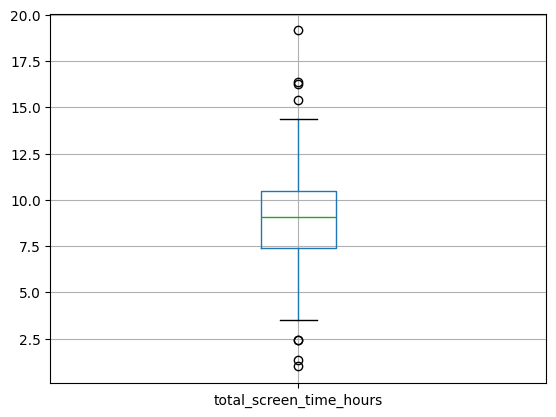

In [11]:
#identify numerical outliers
df_new.boxplot(column=['total_screen_time_hours'])

<Axes: >

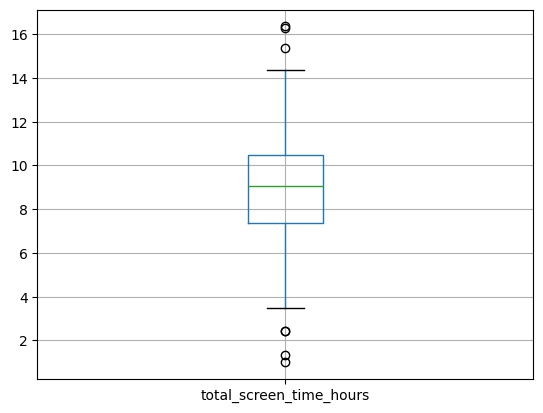

In [12]:
#outliers are below 17.5, remove them
df_nooutlier = df_new[df_new['total_screen_time_hours'] < 17.5]
df_nooutlier.boxplot(column=['total_screen_time_hours'])

<Axes: >

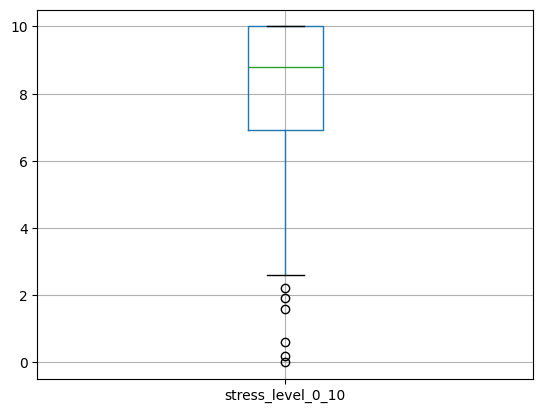

In [13]:
#identify numerical outliers
df_nooutlier.boxplot(column=['stress_level_0_10'])

# Exploratory data Analysis and Interpretation of results


## Sub-Question 1

1. Which occupational group has the highest average screen use?

In [14]:
#pivot table for average screen times of occupational groups
table = pd.pivot_table(df_nooutlier, index = ['occupation'], values= 'total_screen_time_hours', aggfunc=np.mean)
print(table)

               total_screen_time_hours
occupation                            
Employed                      8.886135
Retired                       7.368571
Self-employed                 8.472000
Student                      10.250094
Unemployed                    6.683333


/tmp/ipython-input-521048804.py:2: FutureWarning: The provided callable <function mean at 0x7f1cb632c9a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df_nooutlier, index = ['occupation'], values= 'total_screen_time_hours', aggfunc=np.mean)


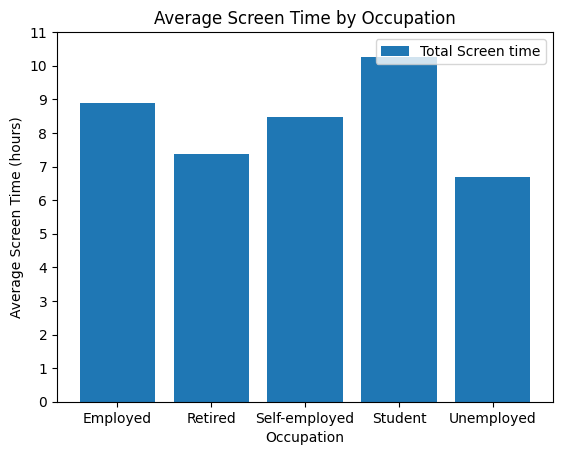

In [15]:
#bar chart that shows the average screen time of each occupation
x= table.index
y= table['total_screen_time_hours']
plt.bar(x, y)
plt.title('Average Screen Time by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Screen Time (hours)')
plt.yticks(np.arange(0, 12, 1))
plt.legend(['Total Screen time'], loc = "upper right")
plt.show()

**Interpreted results**

The graph shows 5 occupation types, and of all the types, students have the highest overall screen time, which leads me to hypothesize that they may have lower levels of wellness than other occupations. Comparatively, retired participants have the lowest screen time hours so I hypothesize their wellness levels may be higher. Since the graph shows no significant gap in the averages of the total screen times of each occupation, there may not be a significantly lower level of wellness in students than in retired individuals.

## Sub-Question 2


2. How much of each occupations' screen time is spent more for leisure vs. work?

In [16]:
#pivot table for leisure and work screen times for all occupations
table2 = pd.pivot_table(df_nooutlier, index = ['occupation'], values= ['work_screen_hours', 'leisure_screen_hours'], aggfunc=np.mean)
print(table2)

               leisure_screen_hours  work_screen_hours
occupation                                            
Employed                   7.100580           1.785556
Retired                    4.567857           2.800714
Self-employed              6.384000           2.088000
Student                    7.277170           2.972925
Unemployed                 5.080370           1.602963


/tmp/ipython-input-1972973902.py:2: FutureWarning: The provided callable <function mean at 0x7f1cb632c9a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table2 = pd.pivot_table(df_nooutlier, index = ['occupation'], values= ['work_screen_hours', 'leisure_screen_hours'], aggfunc=np.mean)


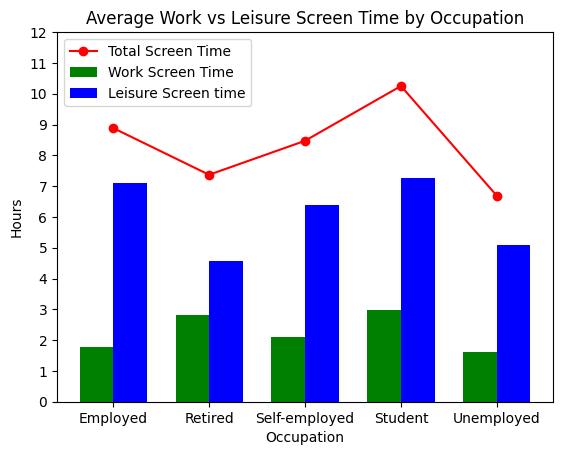

In [17]:
# Grouped bar chart for leisure and work screen hours across occupations
x_axis = np.arange(len(table2.index))
width = 0.35

plt.bar(x_axis - width/2, table2['work_screen_hours'], width, label='Work Screen Time', color='green')
plt.bar(x_axis + width/2, table2['leisure_screen_hours'], width, label='Leisure Screen time', color='blue')

plt.xticks(x_axis, table2.index)
plt.xlabel('Occupation')
plt.ylabel('Hours')
plt.title('Average Work vs Leisure Screen Time by Occupation')

#adding a line chart of the total screen time hours can help visualize the relationship
line1 = plt.plot(x_axis, table['total_screen_time_hours'], marker='o', color='red', label='Total Screen Time')

plt.xticks(x_axis, table2.index)
plt.yticks(np.arange(0, 13, 1))

plt.legend()

plt.show()

**Interpretation**

All of the occupations utilize their screen time more for leisure than for work. Proportionally speaking employed participants have a significantly higher screen time for leisure than for work. Comparatively, it is unexpected that employed particpants utilize screen time for work more than that of retired participants but there may be other factors that play into that. The graph also shows that retired participants balance out their screen time  between leisure and work compared to all other occupations, which could be an opportunity for further inquiry.

## Sub-Question 3

3. Across all occupations, what relationship does total screen usage have with stress levels (wellness outcome)?

In [18]:
# Calculate average stress level for each occupation
wellnesstable = pd.pivot_table(df_nooutlier, index=['occupation'], values=['total_screen_time_hours','stress_level_0_10'], aggfunc=np.mean)
print(wellnesstable)

               stress_level_0_10  total_screen_time_hours
occupation                                               
Employed                8.214493                 8.886135
Retired                 6.635714                 7.368571
Self-employed           7.953333                 8.472000
Student                 8.721698                10.250094
Unemployed              6.462963                 6.683333


/tmp/ipython-input-3219982948.py:2: FutureWarning: The provided callable <function mean at 0x7f1cb632c9a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  wellnesstable = pd.pivot_table(df_nooutlier, index=['occupation'], values=['total_screen_time_hours','stress_level_0_10'], aggfunc=np.mean)


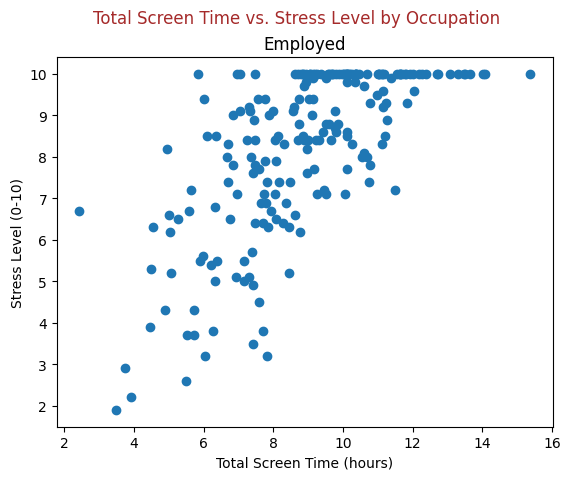

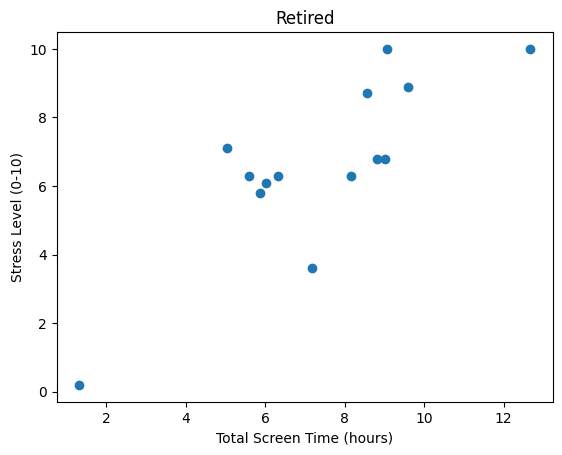

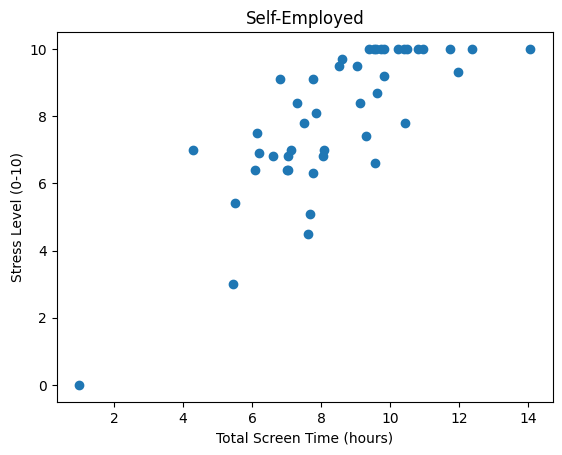

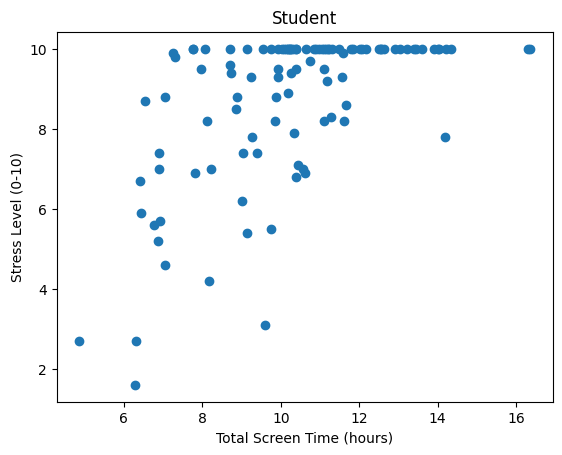

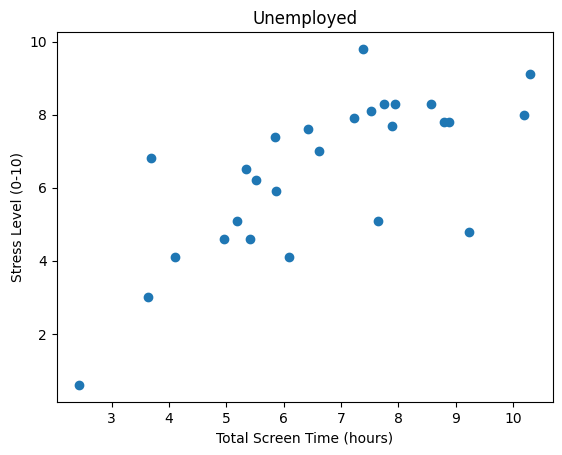

In [19]:
#create scatter plots for stress level vs. total screen time for each occupation

#inserting a title
plt.suptitle('Total Screen Time vs. Stress Level by Occupation', color='brown')

#Employed- scatter plot for stress level vs. total screen time
employed = df_nooutlier[df_nooutlier['occupation'] == 'Employed']
x= employed['total_screen_time_hours']
y= employed['stress_level_0_10']
plt.scatter(x, y)
plt.title('Employed')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

#Retired- scatter plot for stress level vs. total screen time
retired = df_nooutlier[df_nooutlier['occupation'] == 'Retired']
x= retired['total_screen_time_hours']
y= retired['stress_level_0_10']
plt.scatter(x, y)
plt.title('Retired')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

##Self-employed- scatter plot for stress level vs. total screen time
self_employed = df_nooutlier[df_nooutlier['occupation'] == 'Self-employed']
x= self_employed['total_screen_time_hours']
y= self_employed['stress_level_0_10']
plt.scatter(x, y)
plt.title('Self-Employed')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

#Student- scatter plot for stress level vs. total screen time
student = df_nooutlier[df_nooutlier['occupation'] == 'Student']
x= student['total_screen_time_hours']
y= student['stress_level_0_10']
plt.scatter(x, y)
plt.title('Student')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

#Unemployed- scatter plot for stress level vs. total screen time
unemployed = df_nooutlier[df_nooutlier['occupation'] == 'Unemployed']
x= unemployed['total_screen_time_hours']
y= unemployed['stress_level_0_10']
plt.scatter(x, y)
plt.title('Unemployed')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()



**Interpretation**

When looking at the results of the pivot tables, my hypothesis would appear correct that students have a higher screen time thus having a higher stress level, which is the stress level I chose to focus on. This hyposthesis also appears to be the same for the remainder of occupations- the higher the hours of screen time, the higher the stress levels. When looking at the scatter plots, however especially that of the students, it does not reflect a strong relationship between screen time and stress levels.

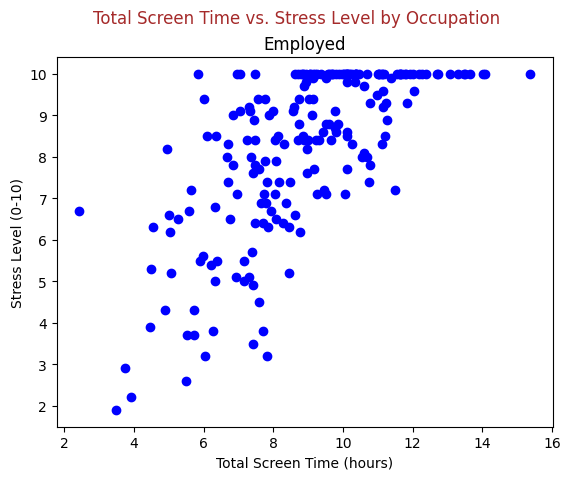

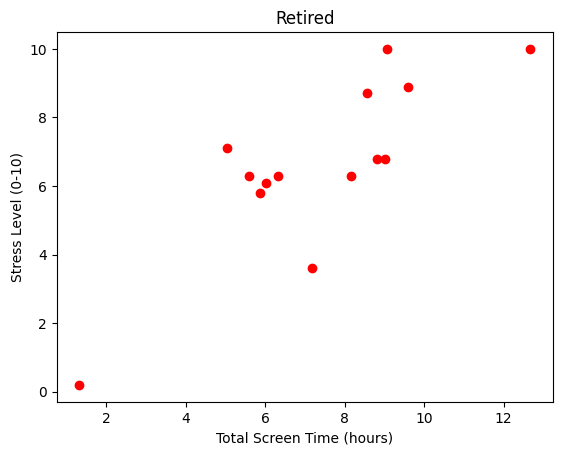

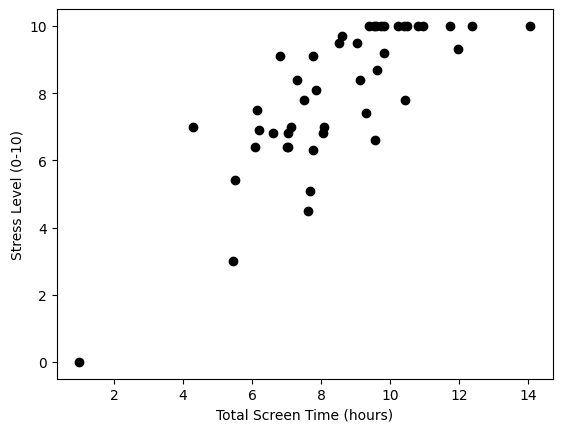

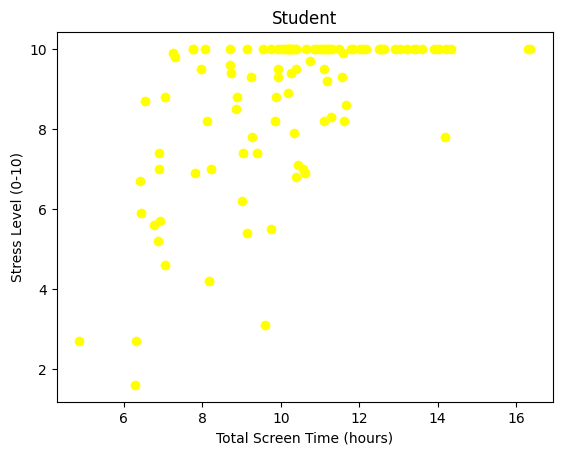

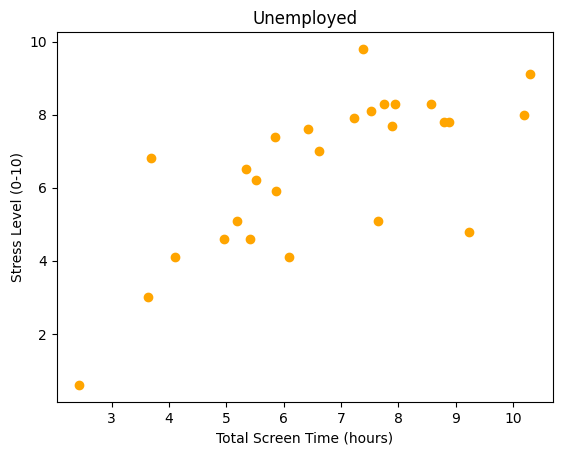

In [20]:
#second try- with colors
#create scatter plots for stress level vs. total screen time for each occupation

#inserting a title
plt.suptitle('Total Screen Time vs. Stress Level by Occupation', color='brown')

#Employed- scatter plot for stress level vs. total screen time
employed = df_nooutlier[df_nooutlier['occupation'] == 'Employed']
x= employed['total_screen_time_hours']
y= employed['stress_level_0_10']
plt.scatter(x, y, color='blue', label='Employed') # Assign color from colormap and add label
plt.title('Employed')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

#Retired- scatter plot for stress level vs. total screen time
retired = df_nooutlier[df_nooutlier['occupation'] == 'Retired']
x= retired['total_screen_time_hours']
y= retired['stress_level_0_10']
plt.scatter(x, y, color= 'red', label='Retired')
plt.title('Retired')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

##Self-employed- scatter plot for stress level vs. total screen time
self_employed = df_nooutlier[df_nooutlier['occupation'] == 'Self-employed']
x= self_employed['total_screen_time_hours']
y= self_employed['stress_level_0_10']
plt.scatter(x, y, color= 'black', label='Self-employed')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

#Student- scatter plot for stress level vs. total screen time
student = df_nooutlier[df_nooutlier['occupation'] == 'Student']
x= student['total_screen_time_hours']
y= student['stress_level_0_10']
plt.scatter(x, y, color='yellow', label='Student')
plt.title('Student')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

#Unemployed- scatter plot for stress level vs. total screen time
unemployed = df_nooutlier[df_nooutlier['occupation'] == 'Unemployed']
x= unemployed['total_screen_time_hours']
y= unemployed['stress_level_0_10']
plt.scatter(x, y, color='orange', label='Unemployed')
plt.title('Unemployed')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

# Summary

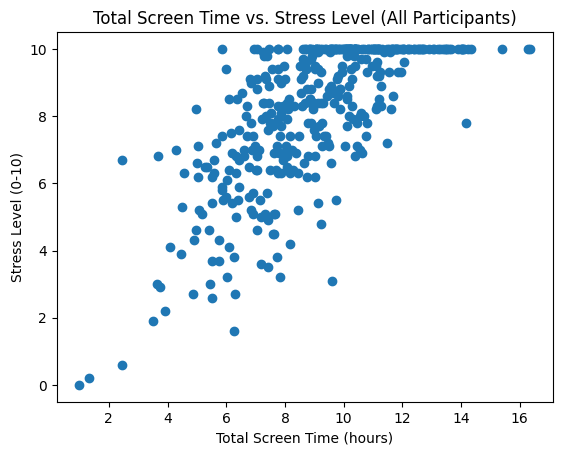

In [21]:
#scatterplot of total screen time compared to stress levels, just as an added visual to test my hypothesis
x= df_nooutlier['total_screen_time_hours']
y= df_nooutlier['stress_level_0_10']
plt.scatter(x, y)
plt.title('Total Screen Time vs. Stress Level (All Participants)')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Stress Level (0-10)')
plt.show()

My main findings indicate there is not a significant relationship between screen time and stress levels based on accupation alone. There is however, a slight relationship between screen time and stress levels (a factor of wellness) overall when looking at the scatter plot for all of the participants. Unfortunately, I can not say it is a strong relationship, because there is a wide spread of points where participants with similar screen times have different stress levels.

I failed to determine if occupation had anything to do with the wellness of participants based on the wellness factor I chose. Also looking at the data set, I may have made the relationship I was tetsting too granular.

I need to further explore if screen time has any effect on or relationship with any of the other wellness factors regardless of occupation to determine if wellness as a whole is affected by screen time.